## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import simplefilter
simplefilter('ignore')

## Data Preprocessing

### Importing the Database

In [2]:
raw_data = pd.read_csv('ml_datasource.csv')
data = raw_data.copy()
data.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


### Removing Outliers

In [3]:
data.dtypes

student_country            object
days_on_platform            int64
minutes_watched           float64
courses_started             int64
practice_exams_started      int64
practice_exams_passed       int64
minutes_spent_on_exams    float64
purchased                   int64
dtype: object

In [4]:
string_col = data.select_dtypes('object').columns
num_col = data.columns.to_list()
for col in string_col:
    num_col.remove(col)
num_col.remove('purchased')
num_data = data[num_col]
num_data.head()

,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams
0,288,358.1,1,2,2,15.81
1,260,1.7,1,1,0,16.00
2,260,22.4,1,1,0,0.93
3,259,18.8,1,1,1,14.63
4,259,118.0,2,2,1,16.48


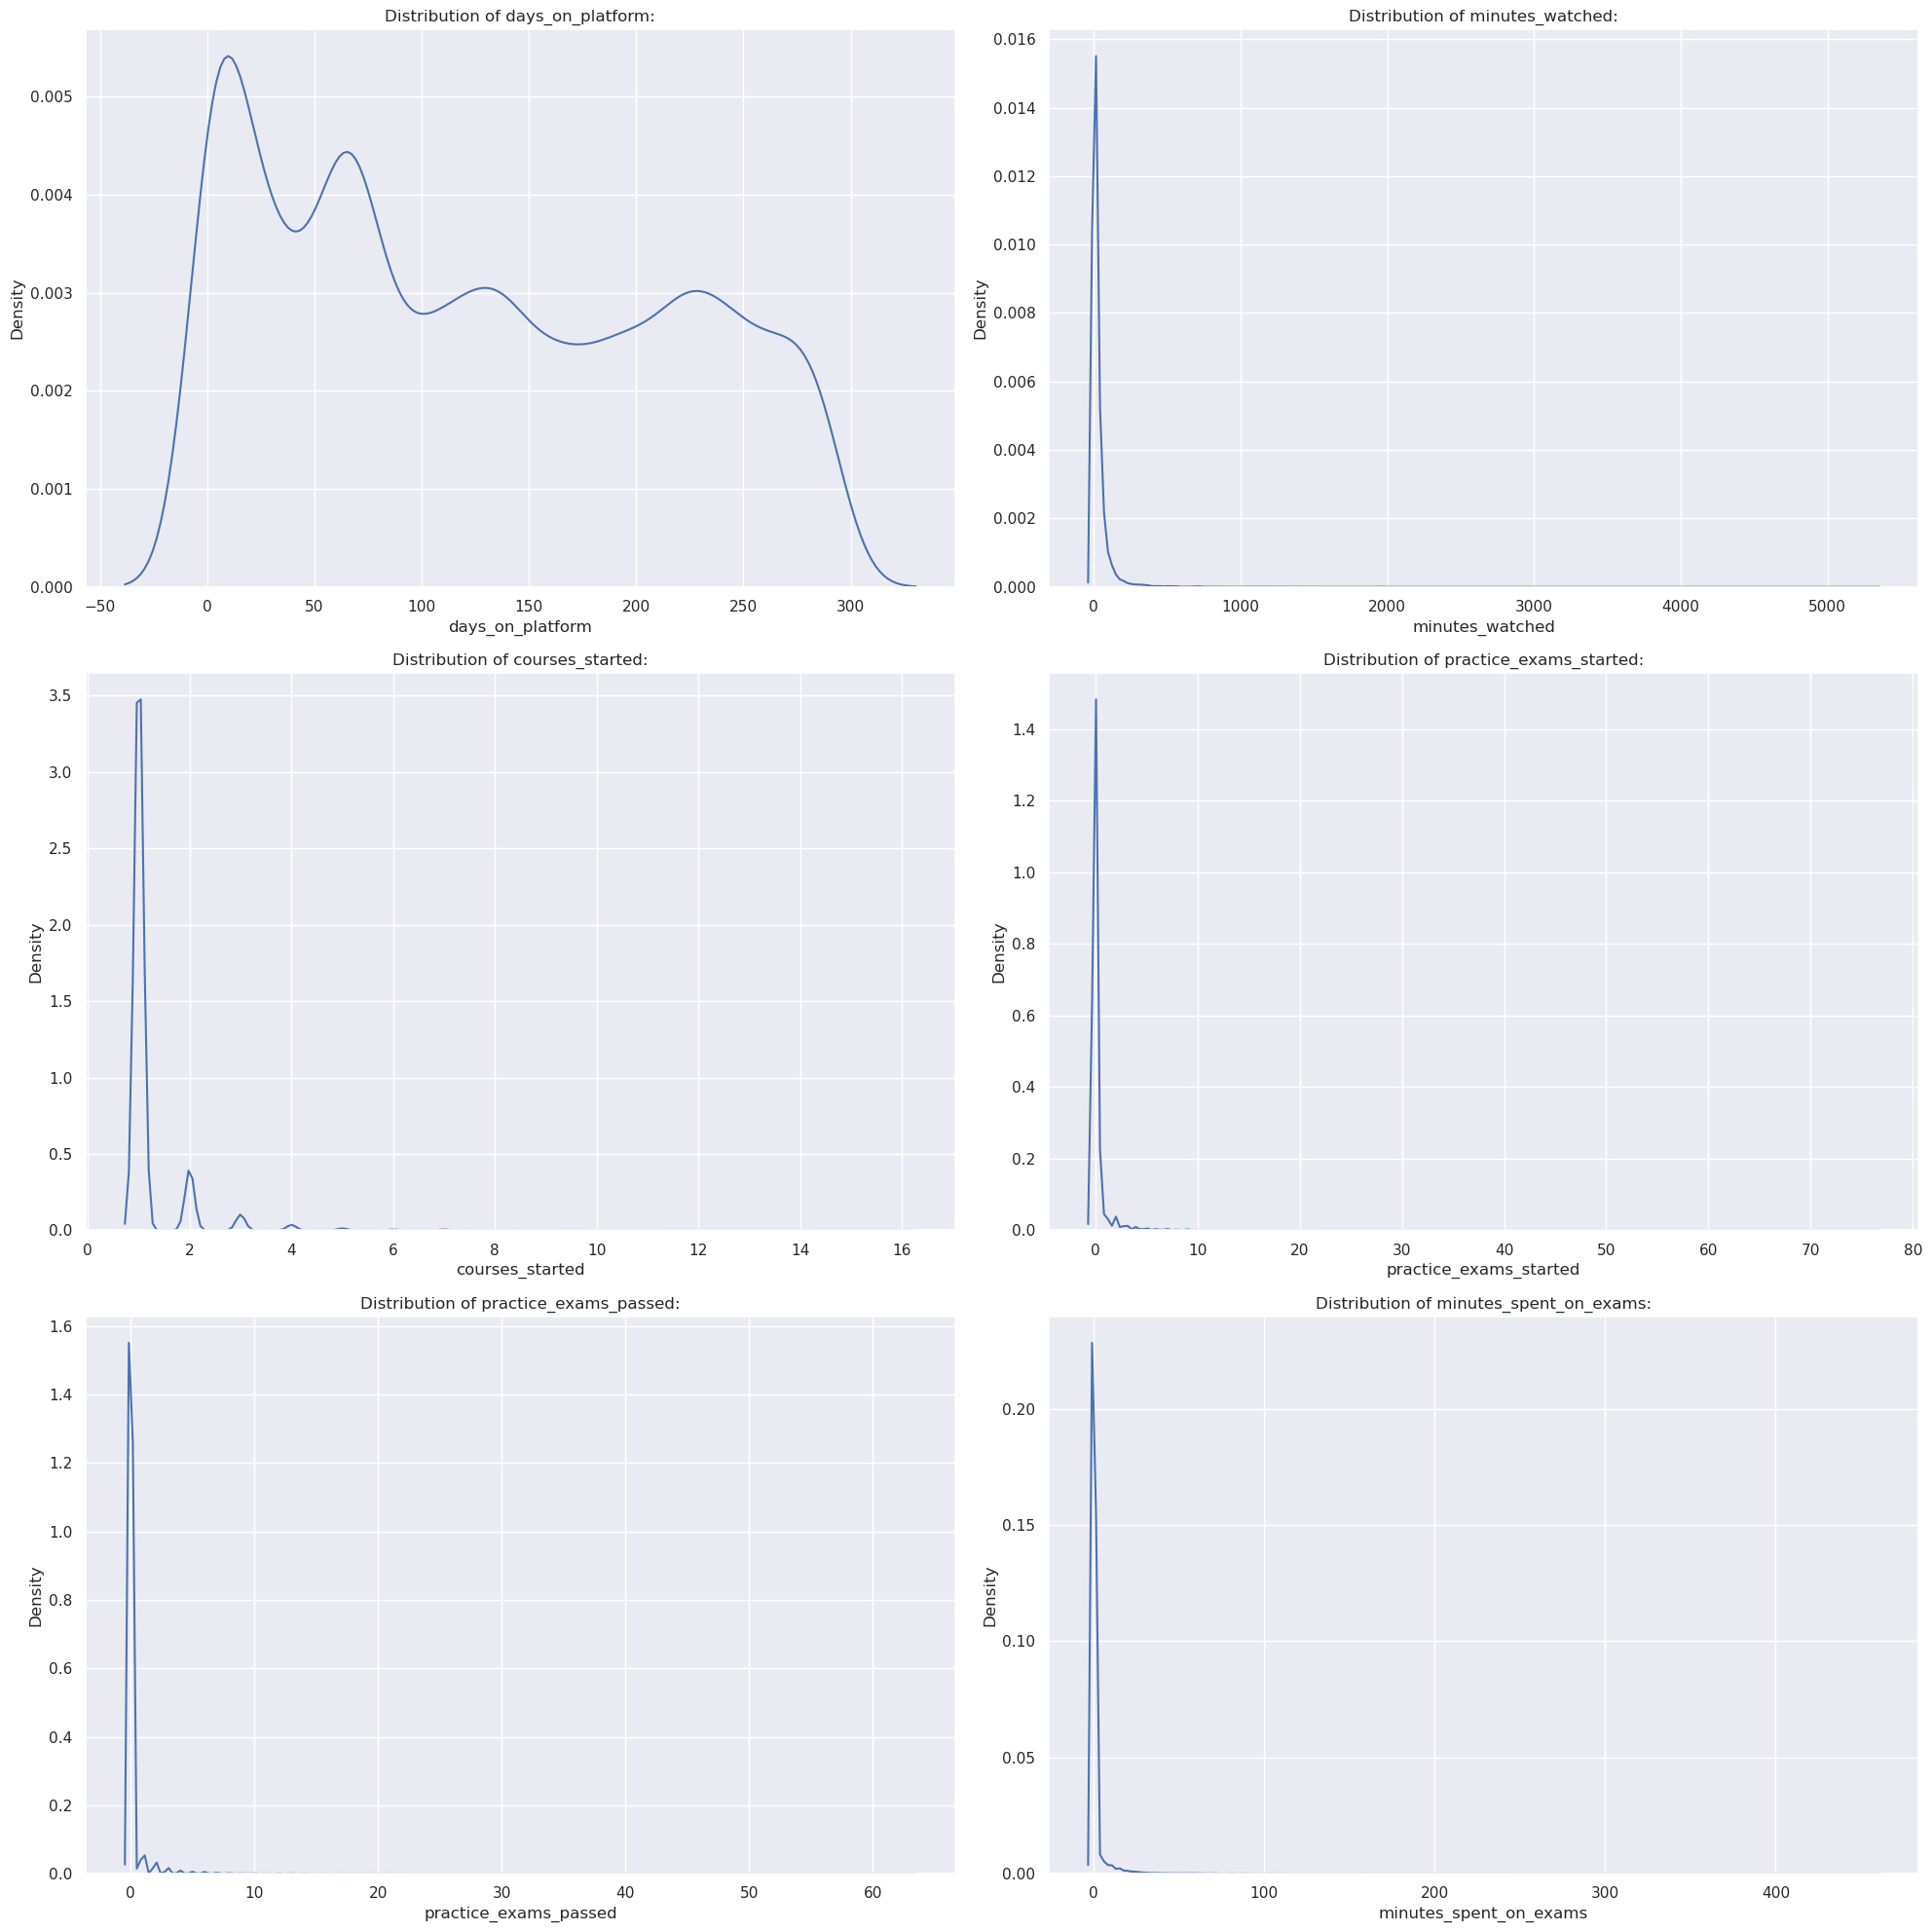

In [5]:
# Examine the distribution plots of the numerical features and study their skewness.
plt.figure(figsize = (20, 20))
for i, col in enumerate(num_data.columns, 1):
    plt.subplot(3, 2, i)
    plt.title(f'Distribution of {col}:')
    sns.kdeplot(data[col])
    plt.tight_layout()
    plt.plot()

- create a new DataFrame that includes only the rows where **minutes_watched** is less than or equal to 1,000, **courses_started** is less than or equal to 10, **practice_exams_started** is less than or equal to 10,
**practice_exams_passed** is less than or equal 10 and **minutes_spent_on_exams** is less than or equal to 40

In [6]:
data_1 = data[data['minutes_watched'] <= 1000]
data_2 = data_1[data_1['courses_started'] <= 10] 
data_3 = data_2[data_2['practice_exams_started'] <= 10] 
data_4 = data_3[data_3['practice_exams_passed'] <= 10] 
data_5 = data_4[data_4['minutes_spent_on_exams'] <= 40]
data_no_outliers = data_5.copy()
data_no_outliers.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


### Checking for Multicollinearity

##### The term ‘multicollinearity refers to a situation where two or more independent variables in a regression model are highly linearly related. Such a problem can make it difficult to determine the individual effect of predictors on the dependent variable and can lead to unstable coefficient estimates.
The Variance Inflation Factor (VIF) is a measure used to detect the presence of multicollinearity in a dataset. A value of 1 indicates that the features are not correlated, while a value greater than 1 suggests the presence of a correlation. As a rule of thumb, a variable with a VIF value higher than 5 indicates problematic multicollinearity

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = num_data.copy()
vif = pd.DataFrame()
vif['Features'] = variables.columns
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif

,Features,VIF
0,days_on_platform,2.201034
1,minutes_watched,2.164842
2,courses_started,2.915547
3,practice_exams_started,7.800678
4,practice_exams_passed,6.644244
5,minutes_spent_on_exams,3.711333


In [8]:
vif = vif[vif['VIF'] <= 5]
vif

,Features,VIF
0,days_on_platform,2.201034
1,minutes_watched,2.164842
2,courses_started,2.915547
5,minutes_spent_on_exams,3.711333


In [9]:
# remove practice_exams_started and practice_exams_started
num_col.remove('practice_exams_started')
num_col.remove('practice_exams_passed')

In [10]:
# check again
num_data = num_data[num_col]
variables = num_data.copy()
vif = pd.DataFrame()
vif['Features'] = variables.columns
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif

,Features,VIF
0,days_on_platform,2.199089
1,minutes_watched,2.044083
2,courses_started,2.909578
3,minutes_spent_on_exams,1.552565


In [11]:
data_no_mult = data_no_outliers.drop(['practice_exams_started', 'practice_exams_passed'], axis = 1)
data_no_mult.head()

,student_country,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,purchased
0,US,288,358.1,1,15.81,0
1,SG,260,1.7,1,16.00,0
2,TR,260,22.4,1,0.93,0
3,KE,259,18.8,1,14.63,0
4,IN,259,118.0,2,16.48,0


- Multicollinearity is good, all columns in the DataFrame have a VIF value smaller than or equal to 5

### Dealing with NaN Values

In [12]:
data_no_mult.isnull().sum()

student_country           8
days_on_platform          0
minutes_watched           0
courses_started           0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

In [13]:
data_no_mult.dropna(inplace = True)
data_no_nulls = data_no_mult.copy()
data_no_nulls.isna().sum()

student_country           0
days_on_platform          0
minutes_watched           0
courses_started           0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

### Splitting the Data

In [14]:
from sklearn.model_selection import train_test_split
inputs = data_no_nulls.drop('purchased', axis = 1)
target = data_no_nulls['purchased']
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, stratify = target, random_state = 365)

### Encoding the Data

- Initialize an instance of the OrdinalEncoder class from the sklearn.preprocessing module and call it enc, which you’ll use to convert categorical text data into numerical data. The handle_unknown parameter should be set to use_encoded_value and the unknown_value parameter to 170. This means that during the transformation process if the encoder encounters a category it did not see during fitting, it will assign it the encoded value of 170.

In [15]:
data_no_nulls['student_country'].nunique()

171

In [16]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = 170)
x_train['student_country'] = oe.fit_transform(x_train['student_country'].to_numpy().reshape(-1, 1))
x_test['student_country'] = oe.transform(x_test['student_country'].to_numpy().reshape(-1, 1))

## Creating a Logistic Regression Model

In [44]:
import statsmodels.api as sm
x =sm.add_constant(x_train)
result = sm.Logit(y_train, x).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.152587
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              purchased   No. Observations:                14094
Model:                          Logit   Df Residuals:                    14088
Method:                           MLE   Df Model:                            5
Date:                Sun, 19 Nov 2023   Pseudo R-squ.:                  0.5036
Time:                        15:37:30   Log-Likelihood:                -2150.6
converged:                       True   LL-Null:                       -4331.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.2019      0.117    -10.310      0.000      -1.430      -0.973
student_country            0.0072      0.001      9.220      0.000       0.006       0.009
days_on_platform          -0.0651      0.002    -30.617      0.000      -0.069      -0.061
minutes_watched            0.0117      0.001     17.192      0.000       0.010       0.013
courses_started            0.3071      0.077      4.002      0.000       0.157       0.457
minutes_spent_on_exams    -0.0517      0.010     -5.033      0.000      -0.072      -0.032
==========================================================================================

Possibly complete quasi-separation: A fraction 0.42 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [17]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(random_state = 365)
model_1.fit(x_train, y_train)

LogisticRegression(random_state=365)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model_1.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[3155,   44],
       [ 139,  186]])

In [19]:
print('the accuracy of the logistic regreesion model is :{:.2f}'.format(accuracy_score(y_test, y_pred)*100))

the accuracy of the logistic regreesion model is :94.81


## Creating a K-Nearest Neighbors Model

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier()
parameters_knn = [
    {
        'n_neighbors': np.arange(1, 51, 5),
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski', 'euclidean', 'manhatton']
    }
]
grid_search_knn = GridSearchCV(estimator = knn, param_grid = parameters_knn, scoring = 'accuracy', verbose = True)
grid_search_knn.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['minkowski', 'euclidean', 'manhatton'],
                          'n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46]),
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy', verbose=True)

In [21]:
grid_search_knn.best_params_

{'metric': 'minkowski', 'n_neighbors': 16, 'weights': 'distance'}

In [22]:
model_2 = KNeighborsClassifier(n_neighbors = 16, weights = 'distance', metric = 'minkowski')
model_2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=16, weights='distance')

In [23]:
y_test_pred_knn = model_2.predict(x_test)
print(confusion_matrix(y_test, y_test_pred_knn))

[[3130   69]
 [  83  242]]


In [24]:
print('the classification report of the K-NN :')
print(classification_report(y_test, y_test_pred_knn))

the classification report of the K-NN :
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3199
           1       0.78      0.74      0.76       325

    accuracy                           0.96      3524
   macro avg       0.88      0.86      0.87      3524
weighted avg       0.96      0.96      0.96      3524



## Creating a Support Vector Machines Model

In [25]:
from sklearn.preprocessing import MinMaxScaler
feature_range = MinMaxScaler()
x_train_svm = feature_range.fit_transform(x_train)
x_test_svm = feature_range.transform(x_test)

In [26]:
from sklearn.svm import SVC
svc = SVC()
parameters_svc = [
    {
        'kernel': ['linear', 'poly', 'rbf'],
        'C': np.arange(1, 11, 1),
        'gamma': ['scale', 'auto']
    }
]
grid_search_svc = GridSearchCV(estimator = svc, param_grid = parameters_svc, scoring = 'accuracy',
                               n_jobs = -1, verbose = True)
grid_search_svc.fit(x_train_svm, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf']}],
             scoring='accuracy', verbose=True)

In [27]:
grid_search_svc.best_params_

{'C': 8, 'gamma': 'scale', 'kernel': 'rbf'}

In [28]:
model_3 = SVC(C = 8, gamma = 'scale', kernel = 'rbf')
model_3.fit(x_train_svm, y_train)

SVC(C=8)

In [29]:
y_test_pred_svm = model_3.predict(x_test_svm)
print(confusion_matrix(y_test, y_test_pred_svm))

[[3147   52]
 [ 114  211]]


In [30]:
print(classification_report(y_test, y_test_pred_svm))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3199
           1       0.80      0.65      0.72       325

    accuracy                           0.95      3524
   macro avg       0.88      0.82      0.85      3524
weighted avg       0.95      0.95      0.95      3524



## Creating a Decision Trees Model

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier()
parameters_dt = [
    {
        'max_depth': [2, 3, 5, 10 ,20],
        'min_samples_leaf': [5, 10, 20, 50, 100],
        'criterion': ['entropy', 'gini'],
        'ccp_alpha': [0.001, 0.002, 0.003, 0.004, 0.005]
    }
]
grid_search_dt = GridSearchCV(estimator = dt, param_grid = parameters_dt, scoring = 'accuracy',
                              n_jobs = -1, verbose = True)
grid_search_dt.fit(x_train, y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'ccp_alpha': [0.001, 0.002, 0.003, 0.004, 0.005],
                          'criterion': ['entropy', 'gini'],
                          'max_depth': [2, 3, 5, 10, 20],
                          'min_samples_leaf': [5, 10, 20, 50, 100]}],
             scoring='accuracy', verbose=True)

In [32]:
grid_search_dt.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 5}

In [33]:
model_4 = DecisionTreeClassifier(ccp_alpha = 0.001, criterion = 'gini', max_depth = 5, min_samples_leaf = 5)
model_4.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5, min_samples_leaf=5)

In [34]:
y_test_pred_dt = model_4.predict(x_test)
print(confusion_matrix(y_test, y_test_pred_dt))

[[3170   29]
 [ 109  216]]


In [35]:
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3199
           1       0.88      0.66      0.76       325

    accuracy                           0.96      3524
   macro avg       0.92      0.83      0.87      3524
weighted avg       0.96      0.96      0.96      3524



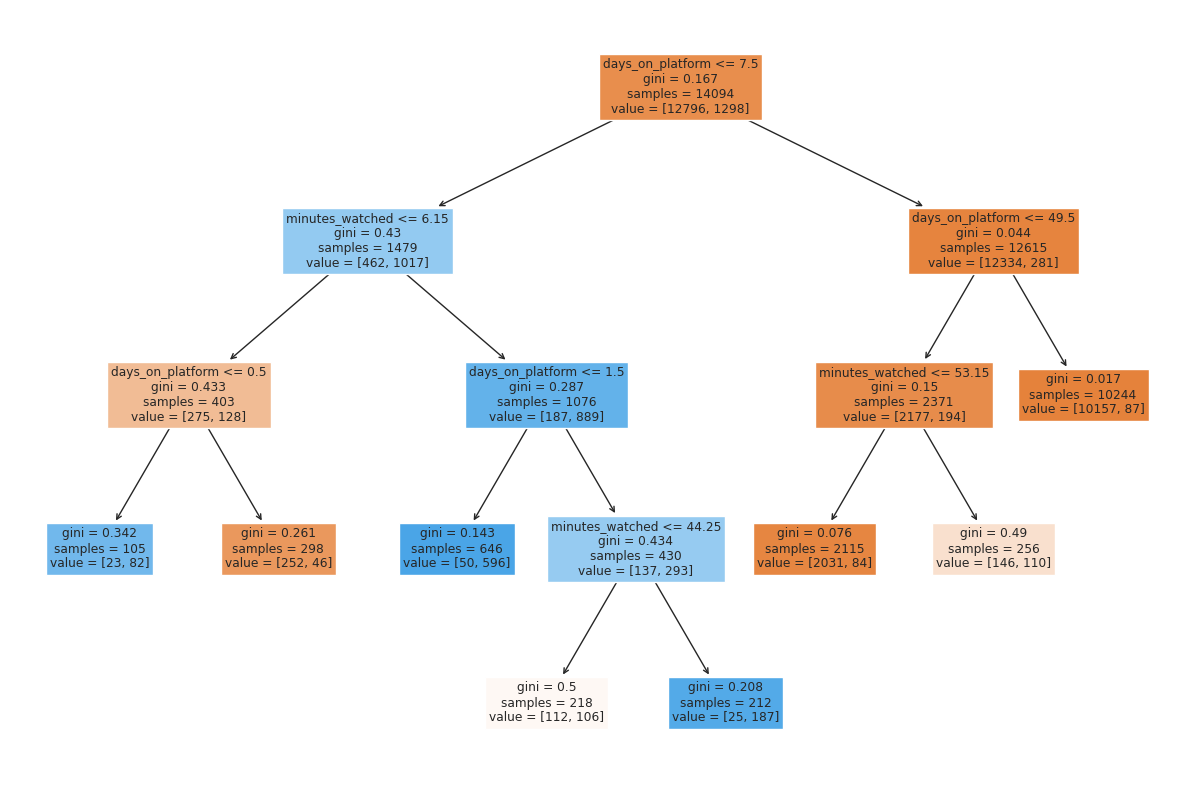

In [36]:
# generate a graphical representation of a decision tree
plt.figure(figsize=(15, 10))
plot_tree(model_4, filled = True, feature_names = x_train.columns)
plt.show()

## Creating a Random Forests Model

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
parameters_rf = [
    {
        'n_estimators': [5, 20, 25, 50, 100],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [2, 3, 5, 10, 20],
        'min_samples_leaf': [5, 10, 20, 50, 100],
        'bootstrap': [True, False],
        'ccp_alpha': [0.001, 0.002, 0.003, 0.004, 0.005]
    }
]
grid_search_rf = GridSearchCV(estimator = rf, param_grid = parameters_rf, scoring = 'accuracy',
                              n_jobs = -1, verbose = True)
grid_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 2500 candidates, totalling 12500 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'ccp_alpha': [0.001, 0.002, 0.003, 0.004, 0.005],
                          'max_depth': [2, 3, 5, 10, 20],
                          'max_features': ['auto', 'sqrt'],
                          'min_samples_leaf': [5, 10, 20, 50, 100],
                          'n_estimators': [5, 20, 25, 50, 100]}],
             scoring='accuracy', verbose=True)

In [38]:
grid_search_rf.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.001,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'n_estimators': 50}

In [39]:
model_5 = RandomForestClassifier(n_estimators = 50, ccp_alpha = 0.001, bootstrap = True, max_depth = 20,
                                 max_features = 'sqrt', min_samples_leaf = 5)
model_5.fit(x_train, y_train)

RandomForestClassifier(ccp_alpha=0.001, max_depth=20, max_features='sqrt',
                       min_samples_leaf=5, n_estimators=50)

In [40]:
y_test_pred_rf = model_5.predict(x_test)
print(confusion_matrix(y_test, y_test_pred_rf))

[[3156   43]
 [  83  242]]


In [41]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3199
           1       0.85      0.74      0.79       325

    accuracy                           0.96      3524
   macro avg       0.91      0.87      0.89      3524
weighted avg       0.96      0.96      0.96      3524



### Alogrithm Results Table :


|Sr. No.|ML Algorithm|Accuracy|
|-|-|-|
|1|Logistic Regression|94.81%|
|2|Support Vector Classifier|95%|
|3|Decision Tree Classifier|96%|
|4|Random Forest Classifier|96%|
|5|K-Nearest Neighbors Classfier|96%|

- Thank You